In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime

In [331]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# PCA Attempt 1 - 16 predictors

### Load Data

In [332]:
model_df = pd.read_parquet('CAISO_qs.parquet')

In [333]:
for c in list(model_df.columns):
    if '_' in c:
        #print(c)
        model_df = model_df.drop(columns=c)

In [334]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 4253 to 6530
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Capacity (MW)   2258 non-null   float64
 1   Status          2258 non-null   object 
 2   Project Length  2258 non-null   int64  
 3   cogeneration    2258 non-null   bool   
 4   combustion      2258 non-null   bool   
 5   thermal         2258 non-null   bool   
 6   reciprocating   2258 non-null   bool   
 7   storage         2258 non-null   bool   
 8   photovoltaic    2258 non-null   bool   
 9   hydro           2258 non-null   bool   
 10  wind            2258 non-null   bool   
 11  gas             2258 non-null   bool   
 12  cycle           2258 non-null   bool   
 13  steam           2258 non-null   bool   
 14  Line            2258 non-null   bool   
 15  Bus             2258 non-null   bool   
 16  Substation      2258 non-null   bool   
dtypes: bool(14), float64(1), int64

### Split into training (inactive) and validation (active) data

In [335]:
active = model_df[model_df["Status"] == "ACTIVE"]
inactive = model_df[model_df["Status"] != "ACTIVE"]

In [336]:
inactive_pca = inactive.drop(columns='Status')
actice_pca = active.drop(columns='Status')

In [337]:
inactive_pca.head()

,Capacity (MW),Project Length,cogeneration,combustion,thermal,reciprocating,storage,photovoltaic,hydro,wind,gas,cycle,steam,Line,Bus,Substation
4717,550.0,3622,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4718,590.0,3260,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4719,850.0,4735,False,False,False,False,False,False,False,False,True,False,False,False,True,True
4720,521.0,1893,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4721,570.0,4660,False,False,False,False,False,False,False,False,False,True,False,False,True,False


### Normalize Data

In [338]:
scaler = StandardScaler()
inactive_norm = scaler.fit_transform(inactive_pca)

In [339]:
inactive_norm.shape[1]

16

### Run PCA

In [340]:
# Initialize PCA model
pca = PCA(n_components=inactive_norm.shape[1])

# Fit and transform the data
pca_data = pca.fit_transform(inactive_norm)

### Plot the Covariance

In [341]:
covariance_df = pd.DataFrame(pca.get_covariance())

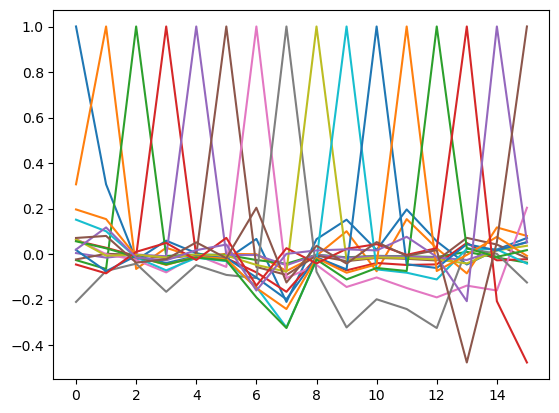

In [342]:
plt.plot(covariance_df)
plt.show()

### Plotting explained variance - Scree Plot

In [343]:
eigenvalues = pca.explained_variance_

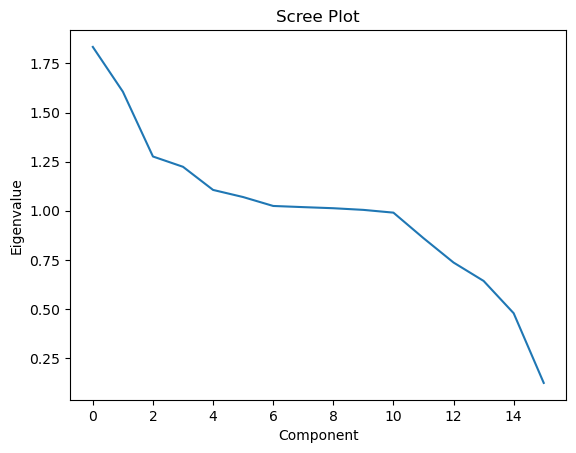

In [344]:
plt.plot(eigenvalues)
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

### Saving each variable back to variable name

In [345]:
evalues = pd.DataFrame(eigenvalues).T
evalues.columns = inactive_pca.columns
evalues

,Capacity (MW),Project Length,cogeneration,combustion,thermal,reciprocating,storage,photovoltaic,hydro,wind,gas,cycle,steam,Line,Bus,Substation
0,1.834081,1.60611,1.276275,1.223829,1.106103,1.069818,1.024451,1.018532,1.012932,1.00452,0.990432,0.860567,0.736443,0.642831,0.478392,0.123606


### Plotting explained variance as a % of total variance

In [346]:
evalues_pct = pd.DataFrame(eigenvalues)
evalues_pct

,0
0,1.834081
1,1.606110
2,1.276275
3,1.223829
4,1.106103
5,1.069818
6,1.024451
7,1.018532
8,1.012932
9,1.004520


In [347]:
evalues_pct['var'] = evalues_pct[0] / evalues_pct[0].sum()

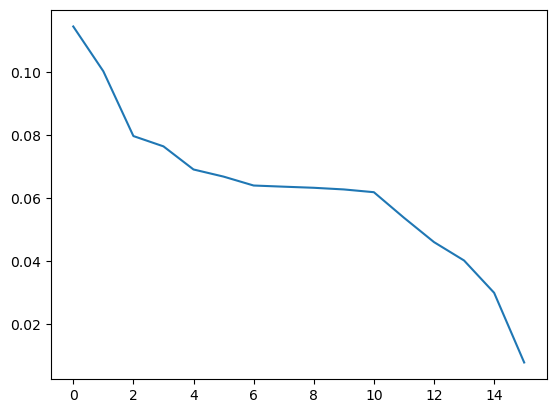

In [348]:
plt.plot(evalues_pct['var'])

No variable explains more than 11.4% of the total variance

# PCA Attempt 2 (Renewable/ Non-Renewable Columns instead of wind/solar/etc.)

In [349]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 4253 to 6530
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Capacity (MW)   2258 non-null   float64
 1   Status          2258 non-null   object 
 2   Project Length  2258 non-null   int64  
 3   cogeneration    2258 non-null   bool   
 4   combustion      2258 non-null   bool   
 5   thermal         2258 non-null   bool   
 6   reciprocating   2258 non-null   bool   
 7   storage         2258 non-null   bool   
 8   photovoltaic    2258 non-null   bool   
 9   hydro           2258 non-null   bool   
 10  wind            2258 non-null   bool   
 11  gas             2258 non-null   bool   
 12  cycle           2258 non-null   bool   
 13  steam           2258 non-null   bool   
 14  Line            2258 non-null   bool   
 15  Bus             2258 non-null   bool   
 16  Substation      2258 non-null   bool   
dtypes: bool(14), float64(1), int64

In [350]:
model_df = model_df.reindex(columns = ["thermal","photovoltaic","wind",
                                      "hydro","cogeneration","combustion","reciprocating",
                                      "gas","steam","cycle","storage","Line","Bus","Substation",
                                      "Capacity (MW)","Status","Project Length"])

In [351]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 4253 to 6530
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   thermal         2258 non-null   bool   
 1   photovoltaic    2258 non-null   bool   
 2   wind            2258 non-null   bool   
 3   hydro           2258 non-null   bool   
 4   cogeneration    2258 non-null   bool   
 5   combustion      2258 non-null   bool   
 6   reciprocating   2258 non-null   bool   
 7   gas             2258 non-null   bool   
 8   steam           2258 non-null   bool   
 9   cycle           2258 non-null   bool   
 10  storage         2258 non-null   bool   
 11  Line            2258 non-null   bool   
 12  Bus             2258 non-null   bool   
 13  Substation      2258 non-null   bool   
 14  Capacity (MW)   2258 non-null   float64
 15  Status          2258 non-null   object 
 16  Project Length  2258 non-null   int64  
dtypes: bool(14), float64(1), int64

In [352]:
model_df["Renewable"] = np.where(model_df.iloc[:, :4].sum(axis=1) > 0, 1, 0)
model_df["Non-Renewable"] = np.where(model_df.iloc[:, 4:10].sum(axis=1) > 0, 1, 0)

In [353]:
model_df = model_df.drop(columns=["thermal","photovoltaic","wind",
                                      "hydro","cogeneration","combustion","reciprocating",
                                      "gas","steam","cycle"])

In [354]:
model_df = model_df.reindex(columns = ["Renewable","Non-Renewable","storage","Line","Bus","Substation",
                                      "Capacity (MW)","Status","Project Length"])

In [356]:
model_df

,Renewable,Non-Renewable,storage,Line,Bus,Substation,Capacity (MW),Status,Project Length
4253,1,0,True,False,True,False,38.00,ACTIVE,2599
4254,1,0,False,False,False,True,193.80,ACTIVE,6795
4255,0,1,True,True,False,False,73.27,ACTIVE,6544
4256,0,0,True,False,False,True,500.00,ACTIVE,8594
4257,1,0,True,True,False,False,150.00,ACTIVE,6582
...,...,...,...,...,...,...,...,...,...
6526,0,0,True,False,False,False,100.00,WITHDRAWN,1143
6527,0,0,True,False,False,True,150.00,WITHDRAWN,1143
6528,0,0,True,False,False,True,50.00,WITHDRAWN,1508
6529,0,0,True,False,False,False,250.00,WITHDRAWN,729


In [357]:
### Split into training (inactive) and validation (active) data

active = model_df[model_df["Status"] == "ACTIVE"]
inactive = model_df[model_df["Status"] != "ACTIVE"]

In [358]:
inactive_pca = inactive.drop(columns='Status')
actice_pca = active.drop(columns='Status')
inactive_pca.head()

,Renewable,Non-Renewable,storage,Line,Bus,Substation,Capacity (MW),Project Length
4717,0,1,False,False,False,False,550.0,3622
4718,0,1,False,False,True,False,590.0,3260
4719,0,1,False,False,True,True,850.0,4735
4720,0,1,False,False,False,False,521.0,1893
4721,0,1,False,False,True,False,570.0,4660


In [359]:
### Normalize Data

scaler = StandardScaler()
inactive_norm = scaler.fit_transform(inactive_pca)

### Run PCA

# Initialize PCA model
pca = PCA(n_components=inactive_norm.shape[1])

# Fit and transform the data
pca_data = pca.fit_transform(inactive_norm)

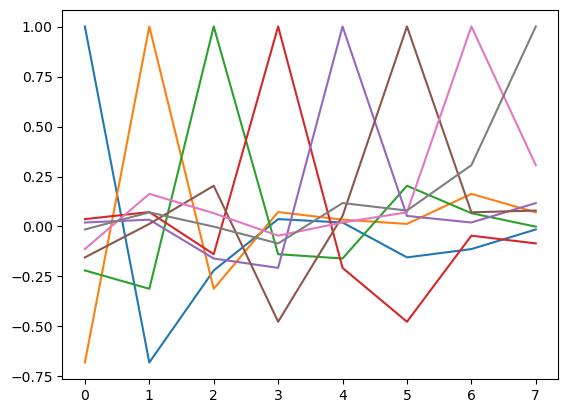

In [360]:
### Plot the Covariance

covariance_df = pd.DataFrame(pca.get_covariance())

plt.plot(covariance_df)
plt.show()

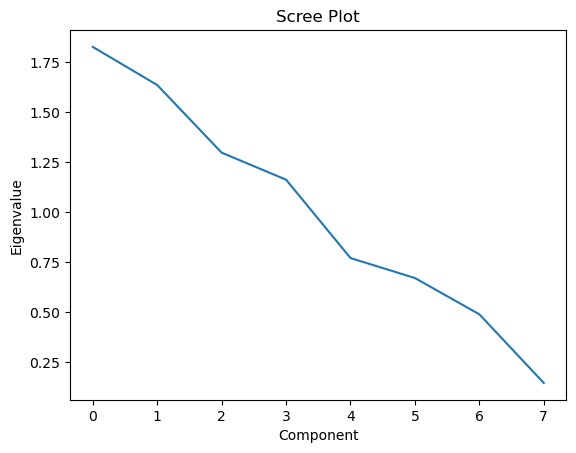

In [361]:
### Plotting explained variance - Scree Plot

eigenvalues = pca.explained_variance_

plt.plot(eigenvalues)
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [362]:
### Saving each variable back to variable name

evalues = pd.DataFrame(eigenvalues).T
evalues.columns = inactive_pca.columns
evalues

,Renewable,Non-Renewable,storage,Line,Bus,Substation,Capacity (MW),Project Length
0,1.827548,1.636716,1.298428,1.163293,0.771152,0.671282,0.489696,0.146346


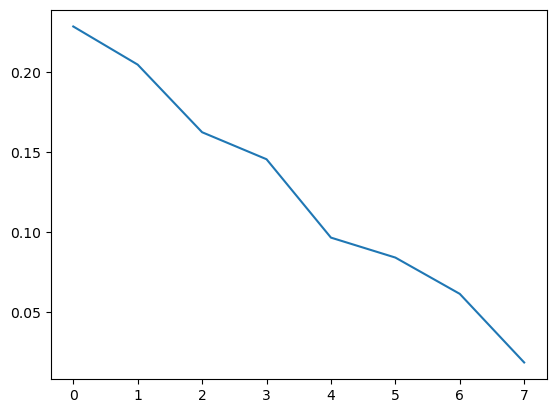

In [363]:
### Plotting explained variance as a % of total variance

evalues_pct = pd.DataFrame(eigenvalues)
evalues_pct

evalues_pct['var'] = evalues_pct[0] / evalues_pct[0].sum()

plt.plot(evalues_pct['var'])

In [364]:
evalues_pct

,0,var
0,1.827548,0.228316
1,1.636716,0.204476
2,1.298428,0.162213
3,1.163293,0.145331
4,0.771152,0.096340
5,0.671282,0.083863
6,0.489696,0.061178
7,0.146346,0.018283


4 variables have eigenvalues above 1, 5 explain 80% of the variance

# Attempt 3 (5 predictors)

In [365]:
model_df = model_df.drop(columns=['Line','Bus','Substation'])

In [366]:
### Split into training (inactive) and validation (active) data

active = model_df[model_df["Status"] == "ACTIVE"]
inactive = model_df[model_df["Status"] != "ACTIVE"]

inactive_pca = inactive.drop(columns='Status')
actice_pca = active.drop(columns='Status')
inactive_pca.head()

,Renewable,Non-Renewable,storage,Capacity (MW),Project Length
4717,0,1,False,550.0,3622
4718,0,1,False,590.0,3260
4719,0,1,False,850.0,4735
4720,0,1,False,521.0,1893
4721,0,1,False,570.0,4660


In [367]:
### Normalize Data

scaler = StandardScaler()
inactive_norm = scaler.fit_transform(inactive_pca)

In [368]:
### Run PCA

# Initialize PCA model
pca = PCA(n_components=inactive_norm.shape[1])

# Fit and transform the data
pca_data = pca.fit_transform(inactive_norm)

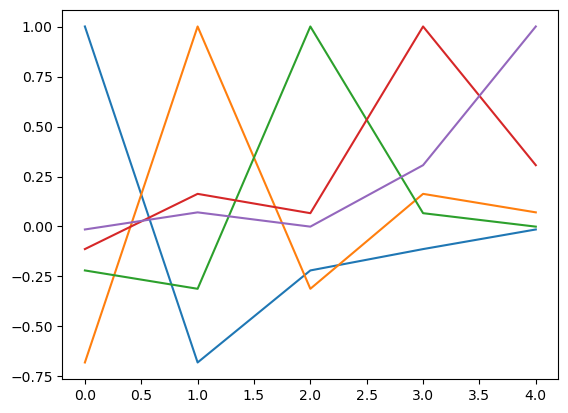

In [369]:
### Plot the Covariance

covariance_df = pd.DataFrame(pca.get_covariance())

plt.plot(covariance_df)
plt.show()

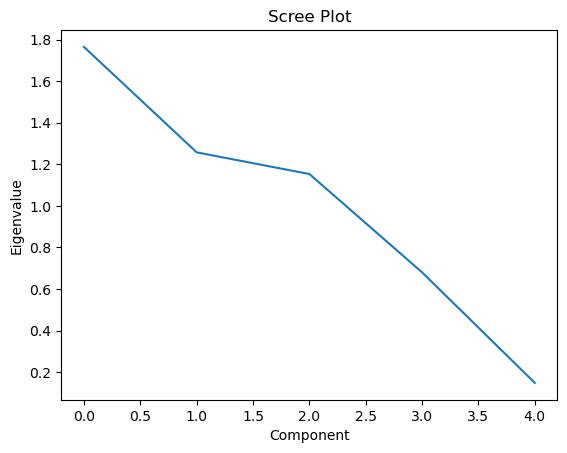

In [370]:
### Plotting explained variance - Scree Plot

eigenvalues = pca.explained_variance_

plt.plot(eigenvalues)
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [371]:
### Saving each variable back to variable name

evalues = pd.DataFrame(eigenvalues).T
evalues.columns = inactive_pca.columns
evalues

,Renewable,Non-Renewable,storage,Capacity (MW),Project Length
0,1.764666,1.257384,1.153056,0.679777,0.147906


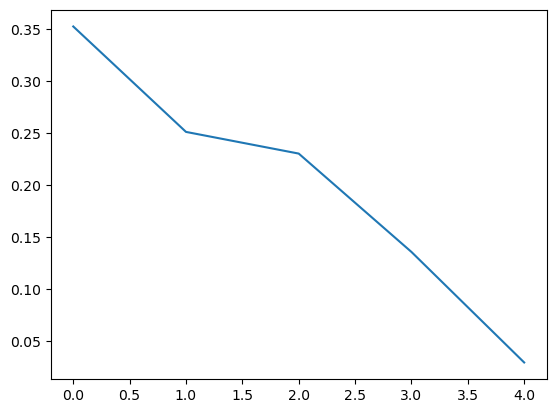

In [374]:
### Plotting explained variance as a % of total variance

evalues_pct = pd.DataFrame(eigenvalues)
evalues_pct

evalues_pct['var'] = evalues_pct[0] / evalues_pct[0].sum()
plt.plot(evalues_pct['var'])
plt.show()

In [373]:
evalues_pct

,0,var
0,1.764666,0.352736
1,1.257384,0.251337
2,1.153056,0.230483
3,0.679777,0.135880
4,0.147906,0.029565
